# Introduction
This example demonstrates [TerraClimate](https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE) dataset -- monthly from 1958-2020 (see reference for details) and processing tools for that developed by [A. Lukashevich](https://www.researchgate.net/profile/Aleksandr-Lukashevich)

In [2]:
import sys
import os
import src.data_processing as dp
from src.utils import *
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

# Determining data files

In [8]:
feature_names = ['tmean']#, 'tmax', 'tmin', 'pr', 'ws', 'vap']
numpys = dp.get_nps(feature_names, 'data/ee_tmp_1990/*.tif') #location for .tif files -- geo data -- saved at your google drive
#pdsi = numpys['pdsi']
tmean = numpys['tmean']
#pr = numpys['pr']
#ws = numpys['ws']
#vap = numpys['vap']

# Dataset demonstration


## Dimensions

In [9]:
print("Number of dimensions: ", len(tmean.shape))
print("First dimension: time - ", tmean.shape[0], " - months")
print("Second dimension: longtitude - ", tmean.shape[1], " - pixels (points)")
print("Third dimension: latitude - ", tmean.shape[2], " - pixels (points)")

Number of dimensions:  3
First dimension: time -  364  - months
Second dimension: longtitude -  285  - pixels (points)
Third dimension: latitude -  623  - pixels (points)


# Plot January of 1958

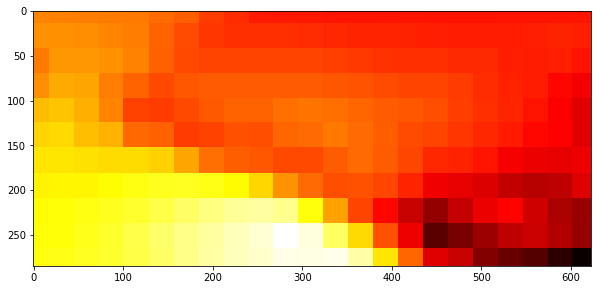

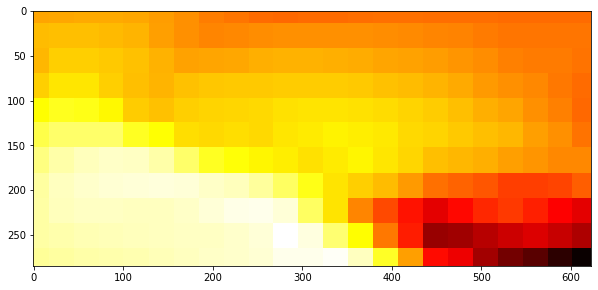

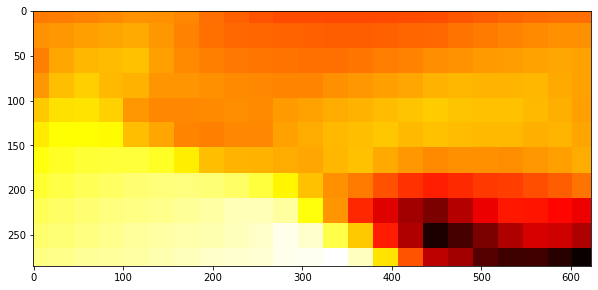

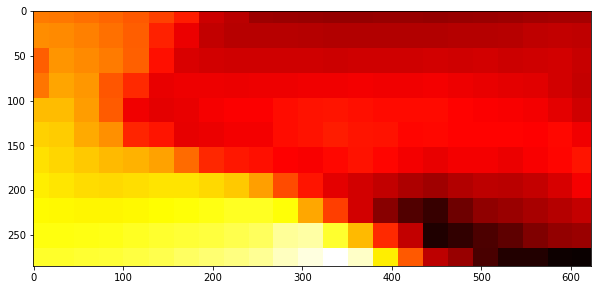

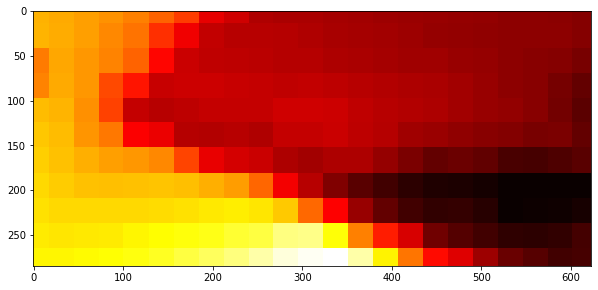

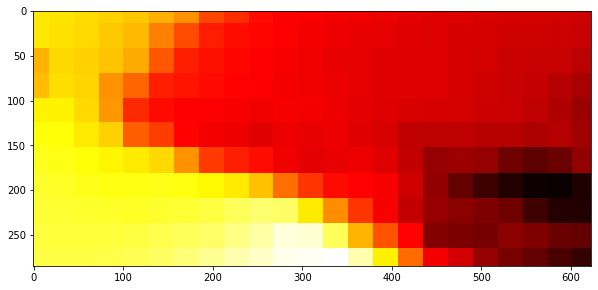

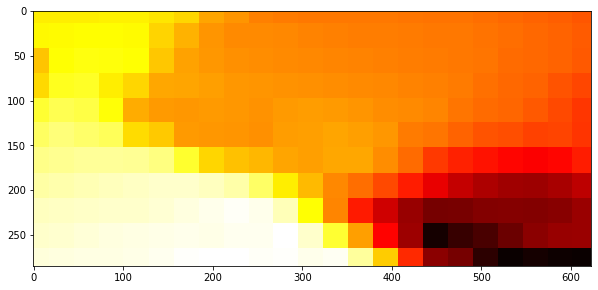

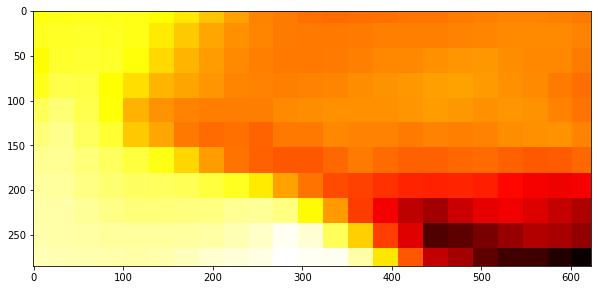

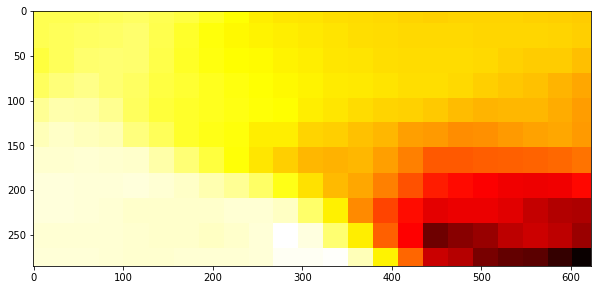

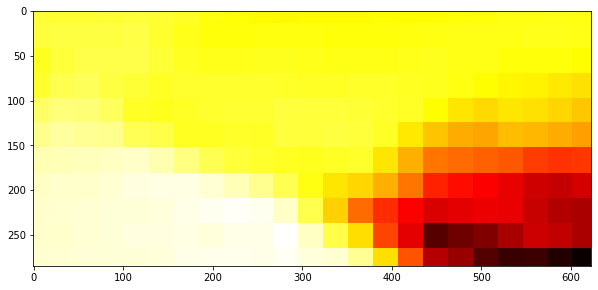

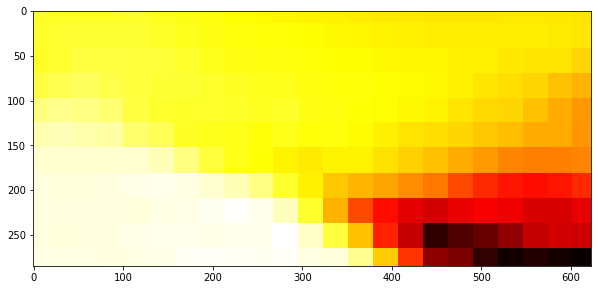

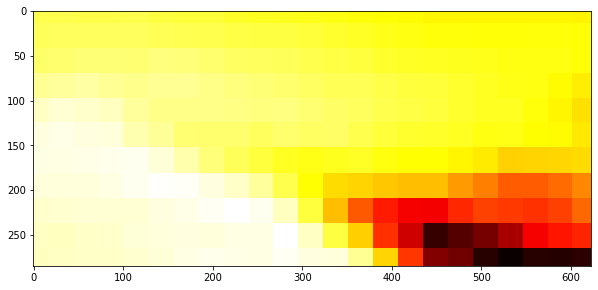

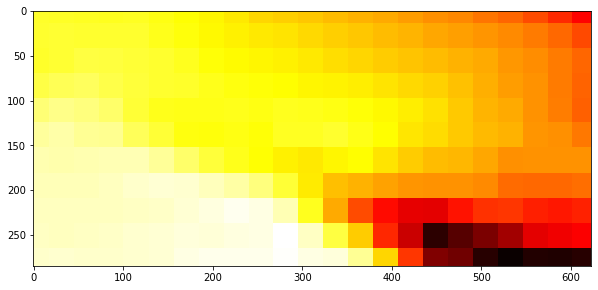

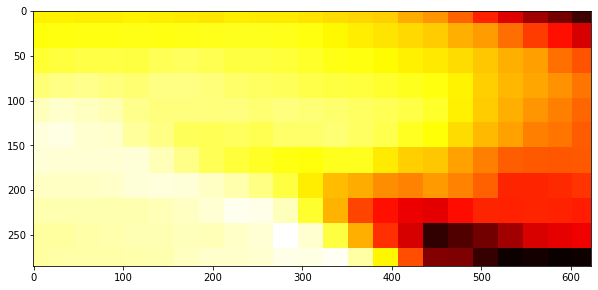

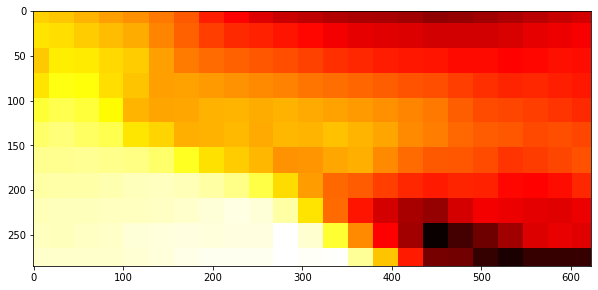

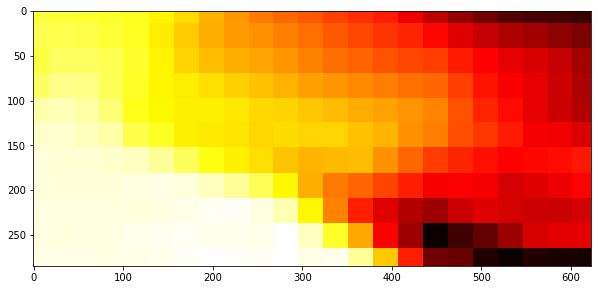

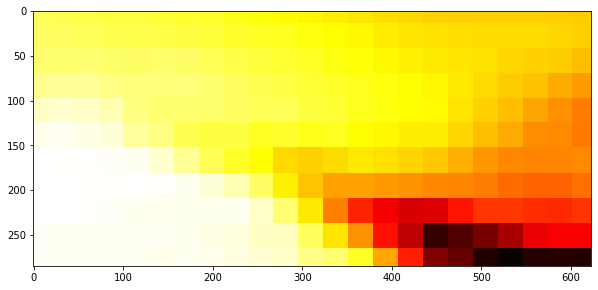

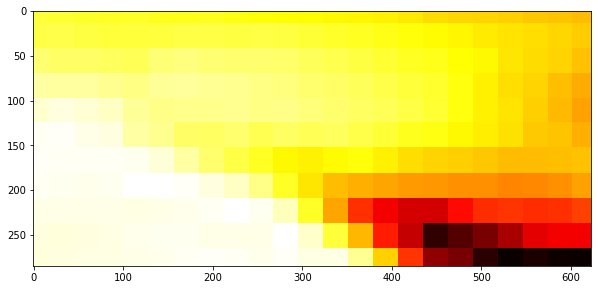

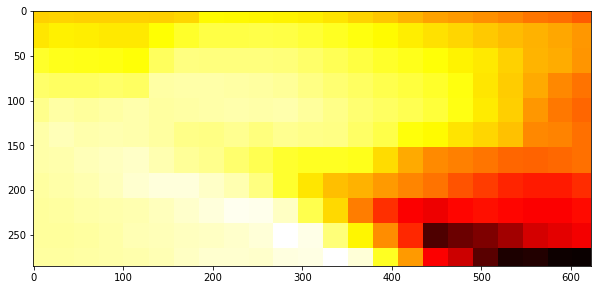

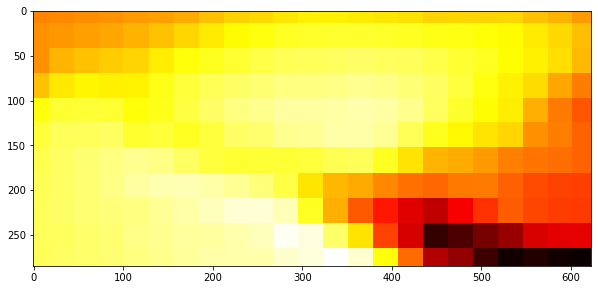

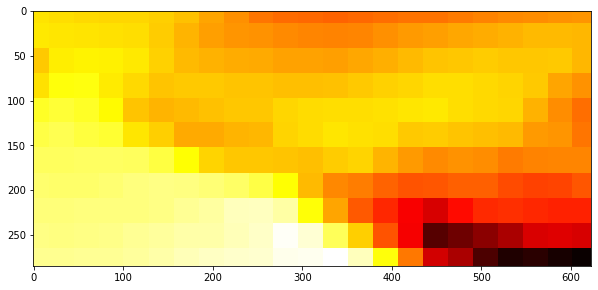

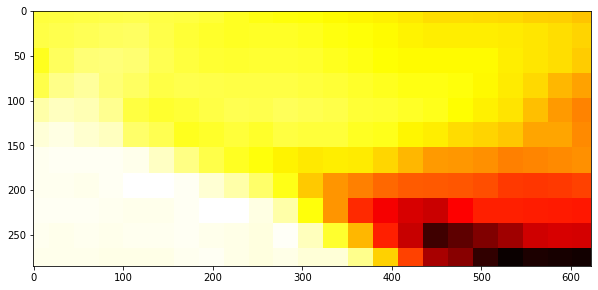

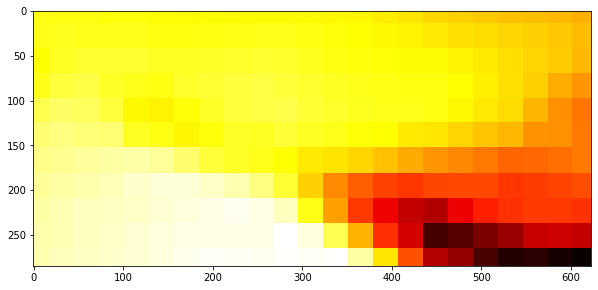

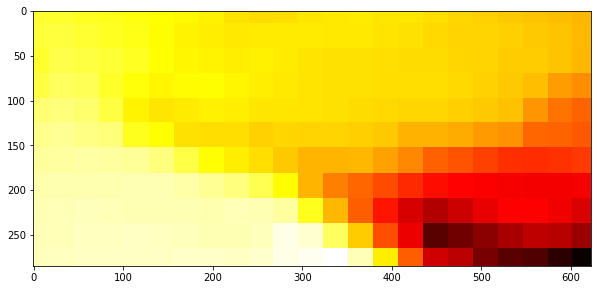

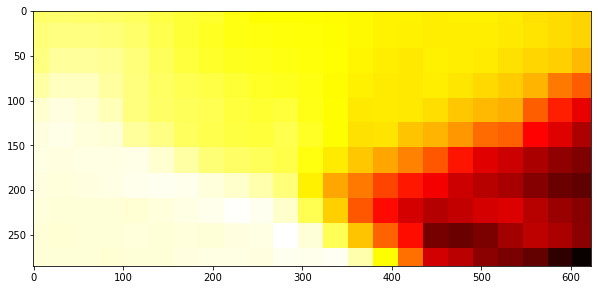

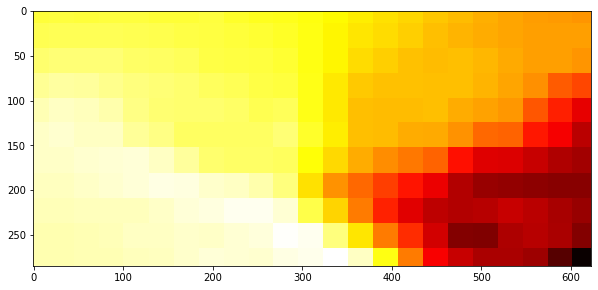

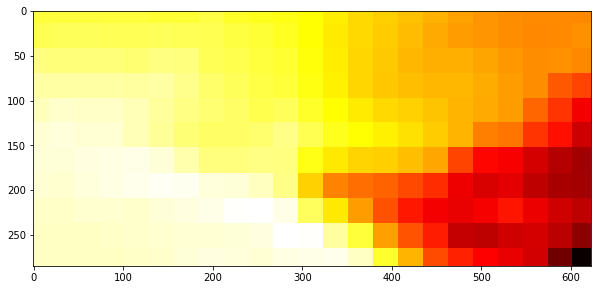

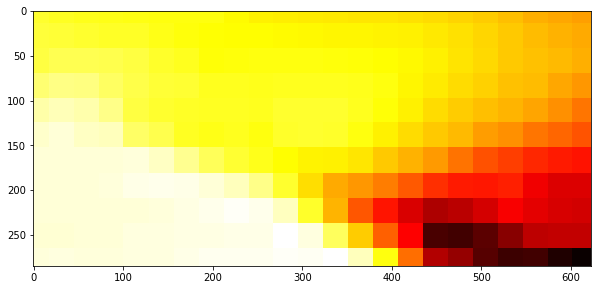

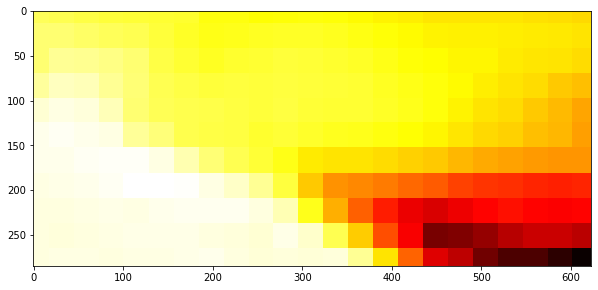

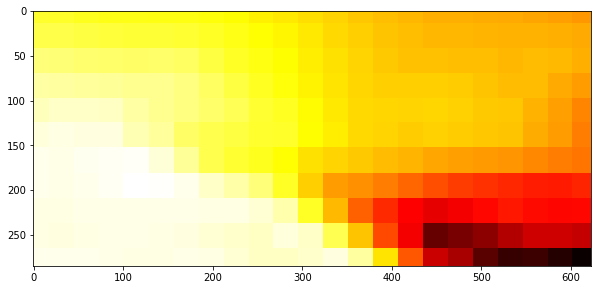

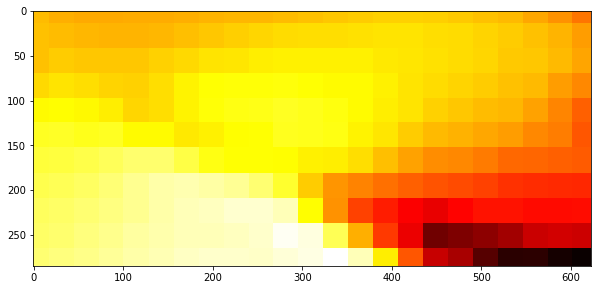

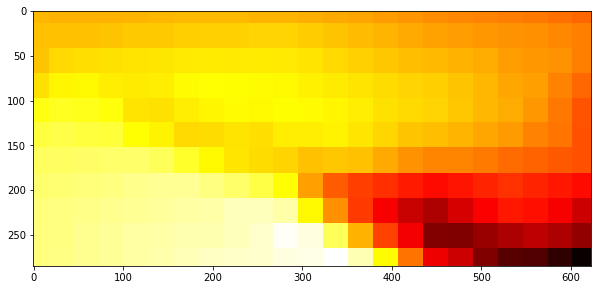

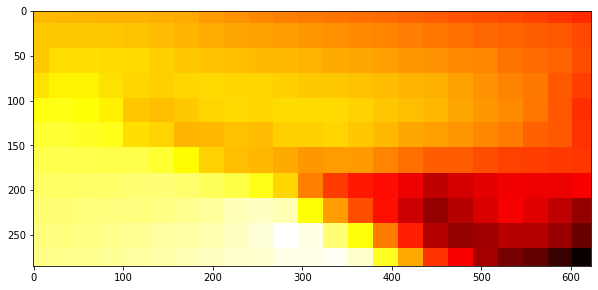

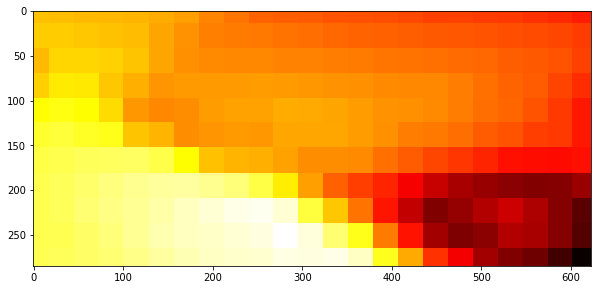

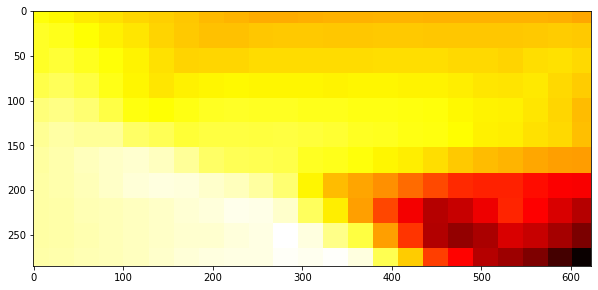

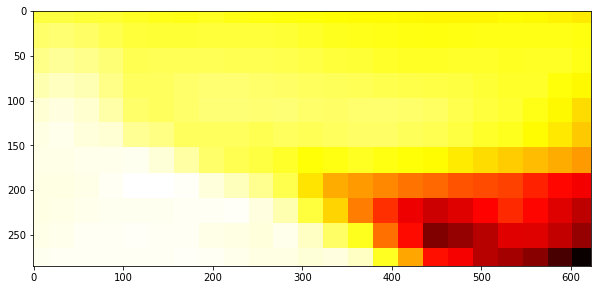

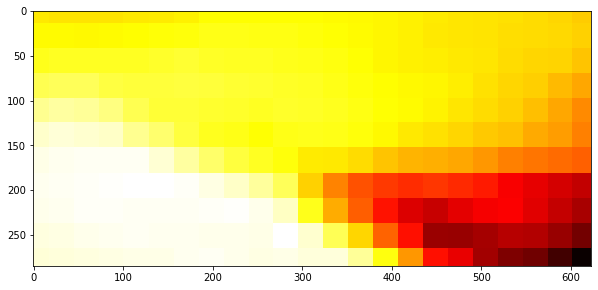

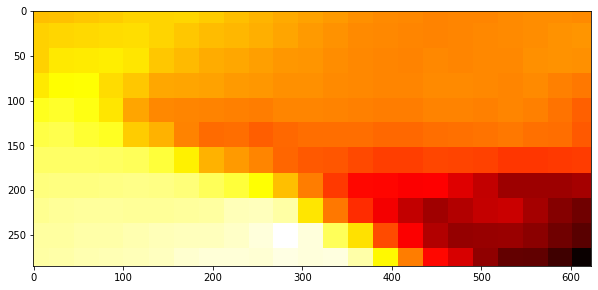

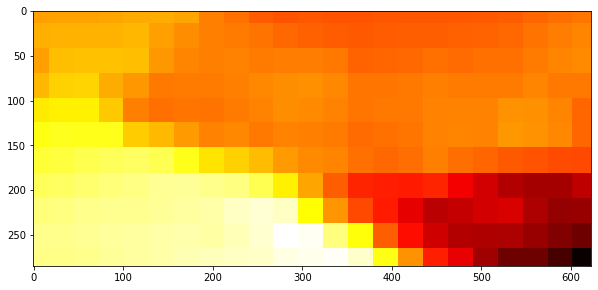

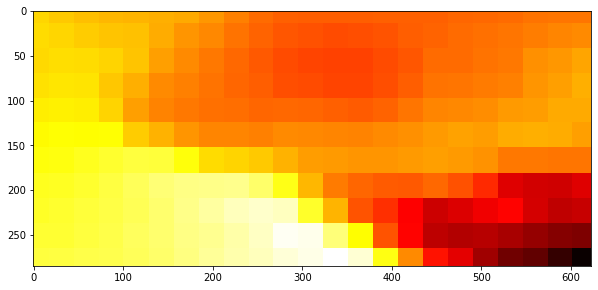

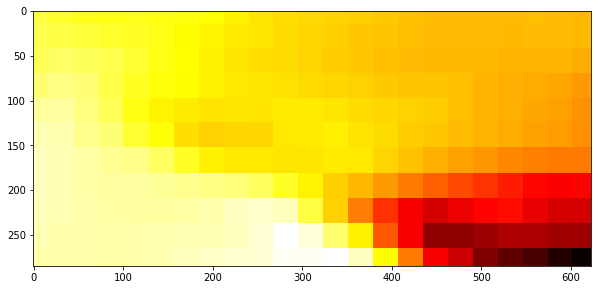

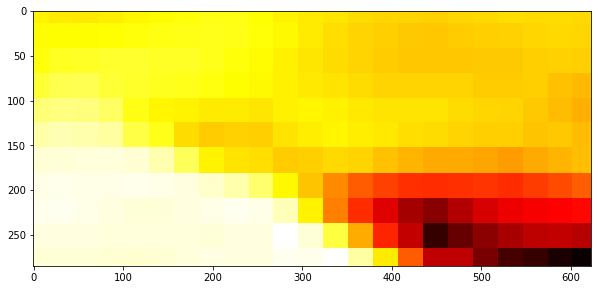

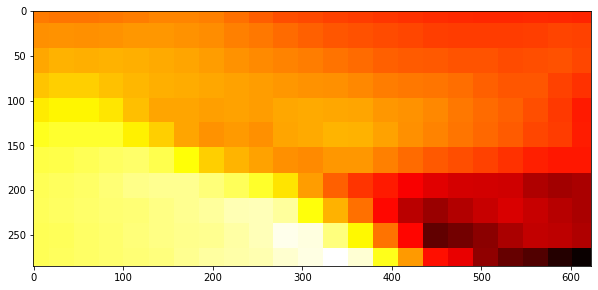

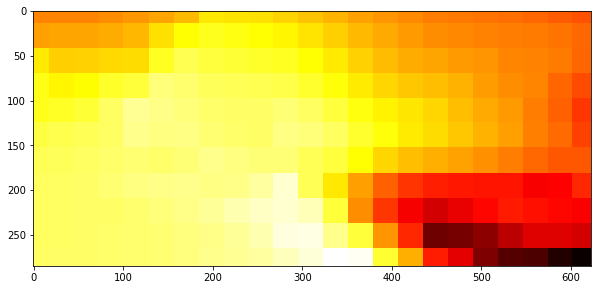

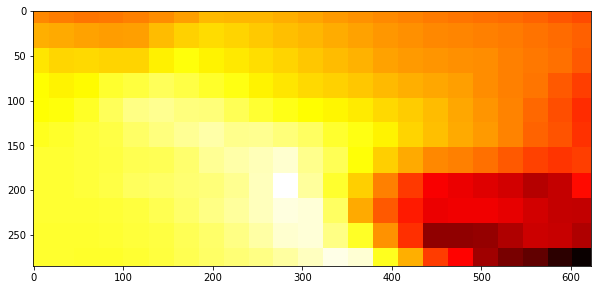

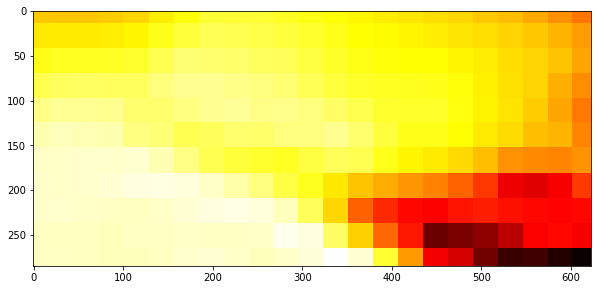

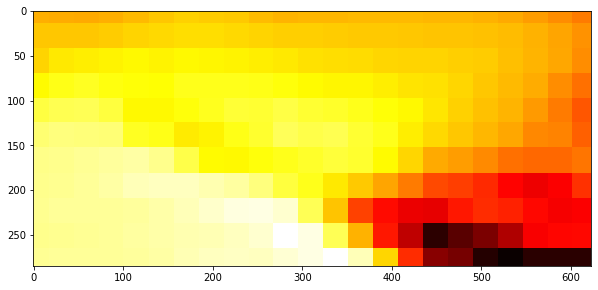

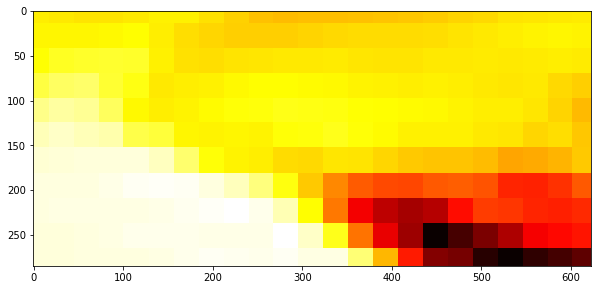

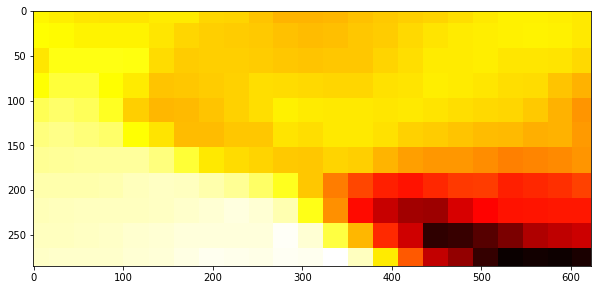

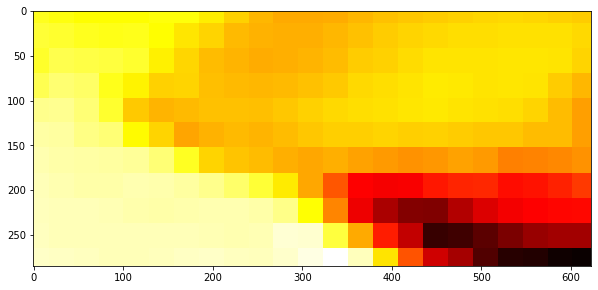

In [10]:
for i in range(50):
    plt.figure(figsize=(10, 5))
    plt.imshow(tmean[i], cmap='hot', interpolation='nearest')
    plt.show()

# Plot time series of temperature at some pixel

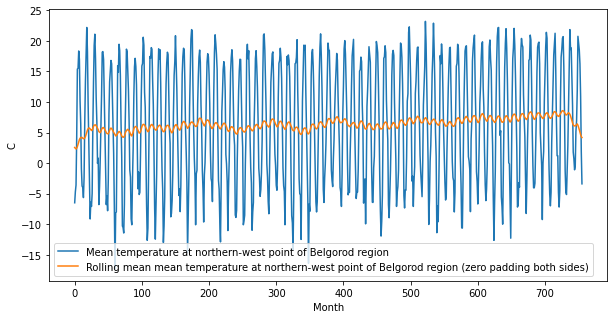

In [ ]:
plt.figure(figsize=(10, 5))
tmean_timeseries = tmean[:, 0, 0]
plt.plot(tmean_timeseries, label='Mean temperature at northern-west point of Belgorod region')
w = 50
tmean_ts_rolling_mean = np.convolve(tmean_timeseries, np.ones(w), mode='same') / w
plt.plot(tmean_ts_rolling_mean, label='Rolling mean mean temperature at northern-west point of Belgorod region (zero padding both sides)')
plt.xlabel("Month")
plt.ylabel("C")
plt.legend()
plt.show()
